In [1]:
! pip install numpy
! pip install matplotlib.pyplot as plt
! pip install pandas
! pip install seaborn 
! pip install scikit-learn
! pip install PCA
! pip install KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached kmeans-1.0.2.tar.gz (5.9 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build KMeans


  error: subprocess-exited-with-error
  
  × Building wheel for KMeans (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [19 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-312
      creating build\lib.win-amd64-cpython-312\kmeans
      copying kmeans\performance.py -> build\lib.win-amd64-cpython-312\kmeans
      copying kmeans\tests.py -> build\lib.win-amd64-cpython-312\kmeans
      copying kmeans\__init__.py -> build\lib.win-amd64-cpython-312\kmeans
      running egg_info
      writing kmeans.egg-info\PKG-INFO
      writing dependency_links to kmeans.egg-info\dependency_links.txt
      writing top-level names to kmeans.egg-info\top_level.txt
      reading manifest file 'kmeans.egg-info\SOURCES.txt'
      writing manifest file 'kmeans.egg-info\SOURCES.txt'
      copying kmeans\lib.c -> build\lib.win-amd64-cpython-312\kmeans
      running build_ext
      building 'kmean

IMPORTING DATASETS

In [3]:
bikes_df=pd.read_csv("C:/Users/Anjali/Downloads/new_bikes.csv")

In [4]:
bikes_df.tail()

,Unnamed: 0,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
48,48,Ather 500X,Ather Energy,Scooter,4.0,150,5.0,165000.0,7.0,90.0,2022.0
49,49,Pure EV Epluto 8G,Pure EV,Scooter,3.5,140,3.5,120000.0,5.0,85.0,2022.0
50,50,Okinawa iPraise Pro X,Okinawa Autotech,Scooter,3.0,120,3.0,95000.0,4.0,70.0,2022.0
51,51,Joy E-Bike Urbanite X3,Electric Vehicle Co.,Bike,2.9,85,2.5,75000.0,3.0,65.0,2022.0
52,52,Ampere Zeo,Ampere Vehicles,Scooter,3.5,120,NaN,NaN,NaN,NaN,NaN


EDA
#Two Wheeler dataset

4 Wheeler Data Analysis(EDA)

In [5]:
bikes_df.drop('Unnamed: 0', axis=1, inplace=True)
bikes_df.drop(52, inplace=True)
bikes_df.head()

,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,Ola Electric S1,Ola,Scooter,2.98,181,5.0,85099.0,4.5,116.0,2021.0
1,Ola Electric S1 Pro,Ola,Scooter,4.00,181,6.5,120149.0,11.0,116.0,2021.0
2,TVS iQube,TVS,Scooter,3.40,75,6.5,117630.0,4.4,78.0,2020.0
3,Aura 300 Plus,Ather Energy,Scooter,2.90,116,4.5,129000.0,6.0,80.0,2021.0
4,Pure EV Epluto 7G,Pure EV,Scooter,2.70,120,3.0,109000.0,5.0,80.0,2021.0


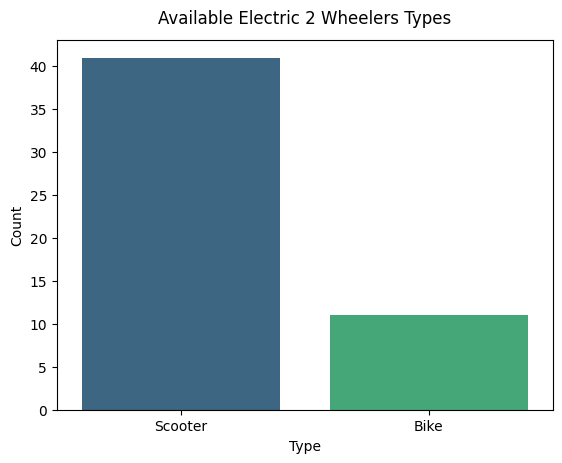

In [6]:
sns.countplot(data=bikes_df, x='Vehicle Type', palette='viridis')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title(label='Available Electric 2 Wheelers Types',pad=12)
plt.show()

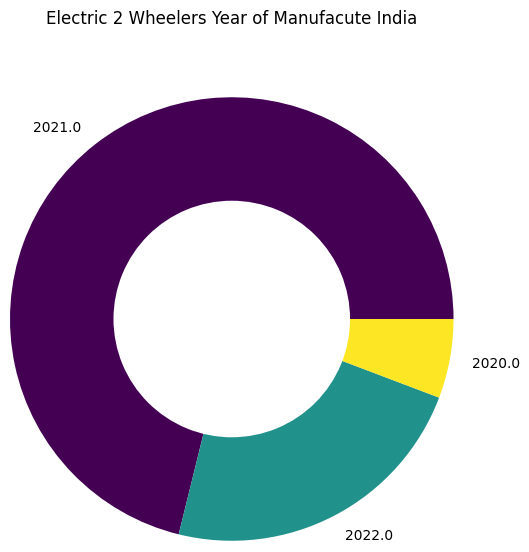

In [7]:
x = bikes_df['Year of Manufacture'].value_counts().plot.pie(radius=1.5, cmap='viridis')
plt.pie(x=[1], radius=.8, colors='white')
plt.title(label='Electric 2 Wheelers Year of Manufacute India', pad=80)
plt.ylabel('')
plt.show()

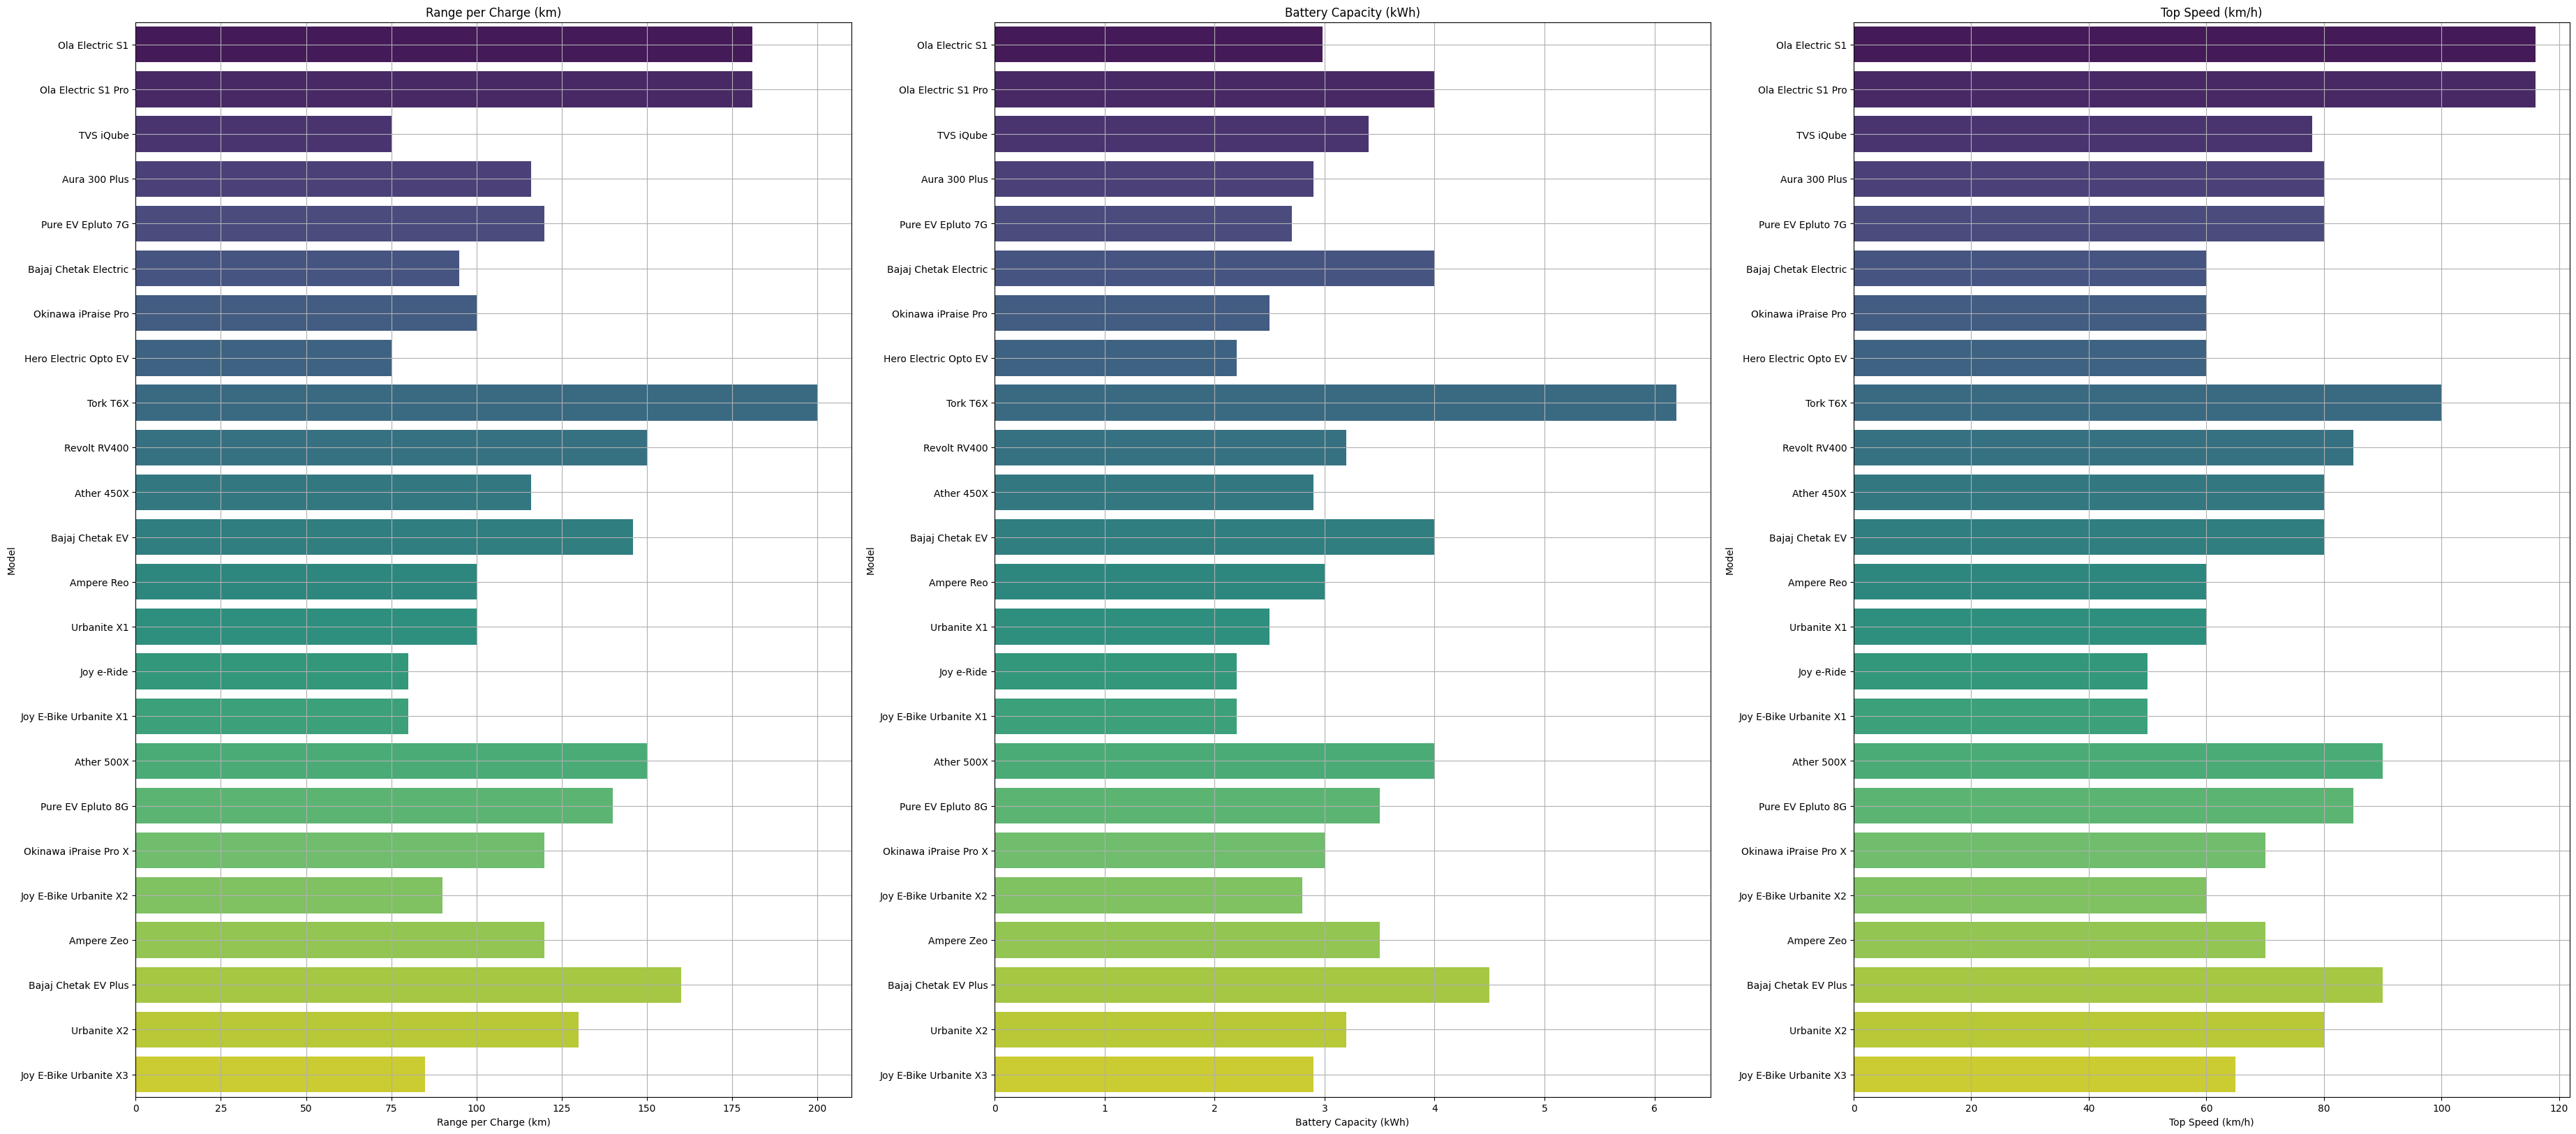

In [8]:
plt.figure(1, figsize=(45,20))
n=0

for x in ['Range per Charge (km)', 'Battery Capacity (kWh)','Top Speed (km/h)']:
    n += 1
    plt.subplot(1,3,n)
    sns.barplot(data=bikes_df, y=bikes_df['Model'].sort_values(ascending=True), x=x, palette='viridis')
    plt.title(f'{x}')
    plt.grid(True)
plt.show()

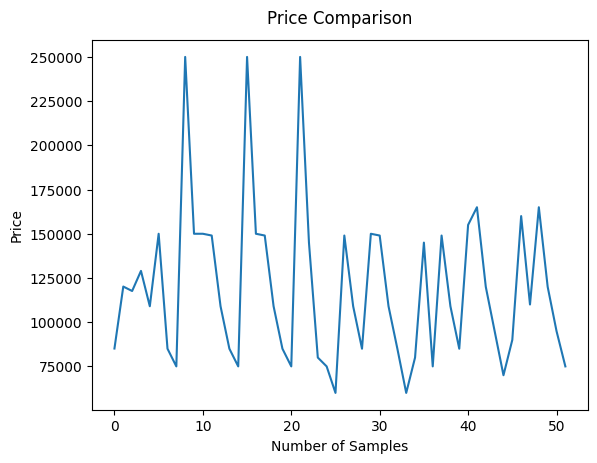

In [12]:
plt.plot(bikes_df['Price'])
plt.xlabel('Number of Samples')
plt.ylabel('Price')
plt.title('Price Comparison',pad=12);

2 Wheeler Segmentation

In [9]:
# 49th row contains NaN values thus dropped
new_bikes_df=bikes_df.drop(49)
new_bikes_df['Vehicle Type'].replace(to_replace=['Scooter','Bike'],value=[0, 1], inplace=True)

In [10]:
X = new_bikes_df[['Vehicle Type','Battery Capacity (kWh)','Range per Charge (km)','Charging Time', 'Price',
         'Power (HP or kW)', 'Top Speed (km/h)', 'Year of Manufacture']]

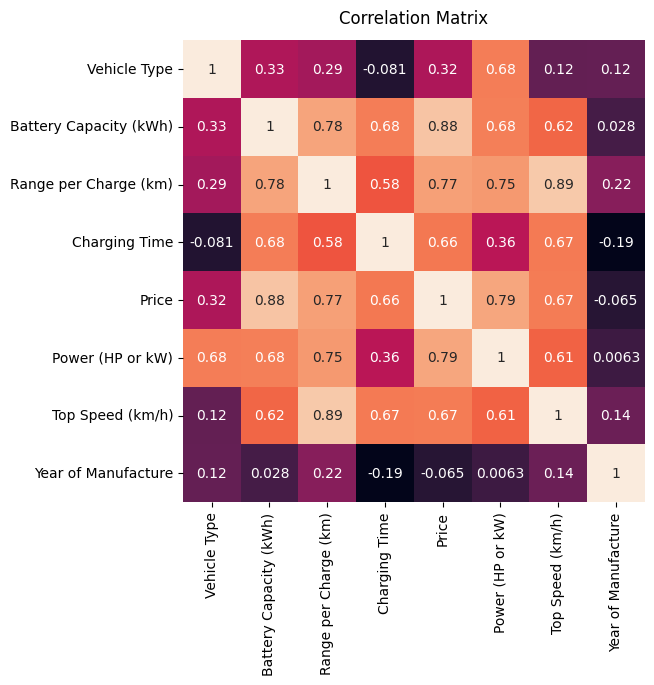

In [11]:
plt.figure(figsize=(6,6))
sns.heatmap(data=X.corr(), annot=True, cbar=False, square=True)
plt.title('Correlation Matrix',pad=12);

PCA Correlated features

In [13]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
pca = PCA()    #creating the instance of class PCA
pca.fit_transform(X_scaled) 
pca.explained_variance_ratio_

array([0.57709368, 0.17253988, 0.13328151, 0.05185932, 0.0335145 ,
       0.01811631, 0.00880176, 0.00479303])

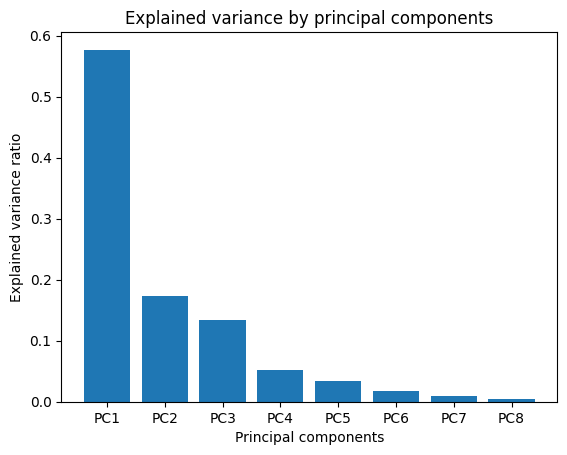

In [15]:
components=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']
var_exp = pca.explained_variance_ratio_
plt.bar(components, var_exp)
plt.title('Explained variance by principal components')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.show()

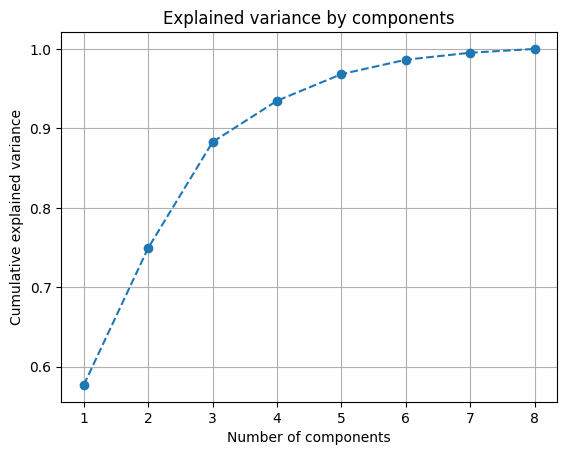

In [16]:
plt.plot(range(1,9),pca.explained_variance_ratio_.cumsum(),marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

In [17]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3','PC4'])
df_pca.head()

,PC1,PC2,PC3,PC4
0,1.503078,-1.388905,1.384091,2.192278
1,3.154668,-1.876417,0.996621,1.296237
2,0.027291,-2.739152,-1.835036,-0.281784
3,0.038391,-0.851359,0.014584,0.209208
4,-0.712720,-0.165038,0.134792,0.754506


In [18]:
rotations = pca.components_.T

rotations_df = pd.DataFrame(rotations, columns=[f'PC{i+1}' for i in range(rotations.shape[1])], index=X.columns[:8])

rotations_df = rotations_df.round(1)

std_devs = np.sqrt(pca.explained_variance_).round(1)

print("Standard deviations:")
print(std_devs)
print("Rotation matrix:")
print(rotations_df)

Standard deviations:
[2.2 1.2 1.  0.7]
Rotation matrix:
                        PC1  PC2  PC3  PC4
Vehicle Type            0.2  0.7 -0.4 -0.0
Battery Capacity (kWh)  0.4 -0.1 -0.0 -0.6
Range per Charge (km)   0.4  0.0  0.2  0.3
Charging Time           0.3 -0.5  0.0 -0.2
Price                   0.4 -0.1 -0.1 -0.3
Power (HP or kW)        0.4  0.3 -0.2  0.2
Top Speed (km/h)        0.4 -0.1  0.3  0.6
Year of Manufacture     0.0  0.4  0.8 -0.3


  File "C:\Users\Anjali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1520.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1520.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1520.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

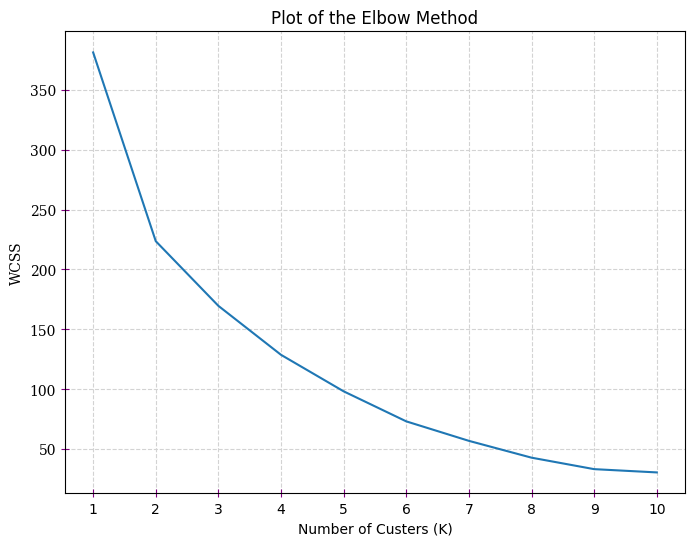

In [19]:
wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [20]:
kmean = KMeans(n_clusters=3, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=3, random_state=90)

In [21]:
print(kmean.labels_)

[2 1 2 2 2 2 0 0 1 1 2 2 2 0 0 1 1 2 2 0 0 1 2 0 0 0 2 2 0 1 2 2 0 0 0 2 0
 2 2 0 1 1 2 0 0 2 1 2 1 0 0]


In [22]:
pd.Series(kmean.labels_).value_counts()

2    21
0    19
1    11
Name: count, dtype: int64

In [23]:
new_bikes_df['clusters'] = kmean.labels_

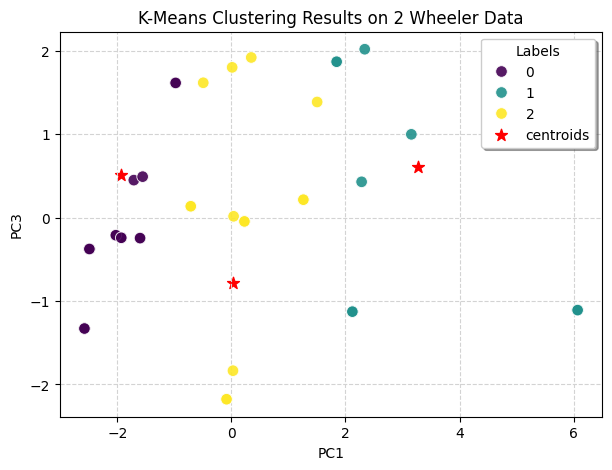

In [24]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC3', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.grid(True)
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results on 2 Wheeler Data')
plt.show()

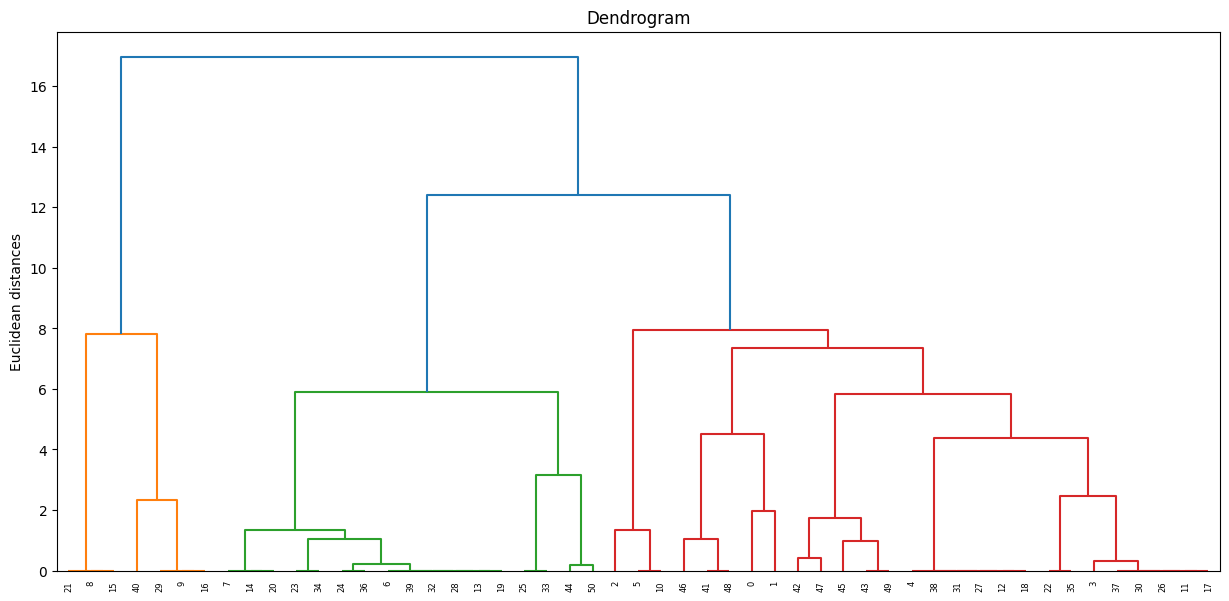

In [25]:
plt.figure(figsize=(15,7))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('')
plt.ylabel('Euclidean distances')
plt.show()

MAKING PREDICTIONS

In [26]:
new_bikes_df["clusters"].value_counts()

clusters
2    21
0    19
1    11
Name: count, dtype: int64

In [27]:
Cluster_0=new_bikes_df[new_bikes_df.clusters==0]
Cluster_1=new_bikes_df[new_bikes_df.clusters==1]
Cluster_2=new_bikes_df[new_bikes_df.clusters==2]

In [28]:
[Cluster_0["Manufacturer"].value_counts().head(),
Cluster_1["Manufacturer"].value_counts().head(),
Cluster_2["Manufacturer"].value_counts().head()]

[Manufacturer
 Okinawa Autotech        8
 Electric Vehicle Co.    5
 Hero Motocorp           3
 Ampere Vehicles         2
 Joy E-Bike              1
 Name: count, dtype: int64,
 Manufacturer
 Revolt Motors    4
 Tork Motors      3
 Ather Energy     2
 Ola              1
 Bajaj Auto       1
 Name: count, dtype: int64,
 Manufacturer
 Pure EV         7
 Ather Energy    6
 Bajaj Auto      4
 TVS             1
 Ola             1
 Name: count, dtype: int64]

In [29]:
[Cluster_0["Price"].value_counts().head(),
Cluster_1["Price"].value_counts().head(),
Cluster_2["Price"].value_counts().head()]

[Price
 85000.0    6
 75000.0    6
 80000.0    2
 60000.0    2
 95000.0    2
 Name: count, dtype: int64,
 Price
 250000.0    3
 150000.0    3
 165000.0    2
 120149.0    1
 155000.0    1
 Name: count, dtype: int64,
 Price
 109000.0    6
 149000.0    5
 150000.0    2
 145000.0    2
 117630.0    1
 Name: count, dtype: int64]

In [30]:
[Cluster_0["Vehicle Type"].value_counts().head(),
Cluster_1["Vehicle Type"].value_counts().head(),
Cluster_2["Vehicle Type"].value_counts().head()]

[Vehicle Type
 0    15
 1     4
 Name: count, dtype: int64,
 Vehicle Type
 1    7
 0    4
 Name: count, dtype: int64,
 Vehicle Type
 0    21
 Name: count, dtype: int64]

In [31]:
[Cluster_0["Top Speed (km/h)"].value_counts().head(),
Cluster_1["Top Speed (km/h)"].value_counts().head(),
Cluster_2["Top Speed (km/h)"].value_counts().head()]

[Top Speed (km/h)
 60.0    14
 50.0     2
 70.0     2
 65.0     1
 Name: count, dtype: int64,
 Top Speed (km/h)
 85.0     4
 100.0    3
 90.0     3
 116.0    1
 Name: count, dtype: int64,
 Top Speed (km/h)
 80.0     15
 60.0      2
 78.0      1
 116.0     1
 85.0      1
 Name: count, dtype: int64]

In [32]:
[Cluster_0["Range per Charge (km)"].value_counts().head(),
Cluster_1["Range per Charge (km)"].value_counts().head(),
Cluster_2["Range per Charge (km)"].value_counts().head()]

[Range per Charge (km)
 100    10
 75      3
 80      2
 120     2
 90      1
 Name: count, dtype: int64,
 Range per Charge (km)
 150    6
 200    3
 181    1
 160    1
 Name: count, dtype: int64,
 Range per Charge (km)
 120    7
 116    6
 146    2
 95     2
 181    1
 Name: count, dtype: int64]

In [33]:
[Cluster_0["Battery Capacity (kWh)"].value_counts().head(),
Cluster_1["Battery Capacity (kWh)"].value_counts().head(),
Cluster_2["Battery Capacity (kWh)"].value_counts().head()]

[Battery Capacity (kWh)
 2.5    8
 2.2    5
 3.0    4
 2.8    1
 2.9    1
 Name: count, dtype: int64,
 Battery Capacity (kWh)
 3.2    4
 4.0    3
 6.2    3
 4.5    1
 Name: count, dtype: int64,
 Battery Capacity (kWh)
 2.90    6
 2.70    6
 4.00    4
 3.50    2
 2.98    1
 Name: count, dtype: int64]

In [34]:
[Cluster_0["Charging Time"].value_counts().head(),
Cluster_1["Charging Time"].value_counts().head(),
Cluster_2["Charging Time"].value_counts().head()]

[Charging Time
 3.0    13
 2.5     4
 3.5     2
 Name: count, dtype: int64,
 Charging Time
 5.0    5
 4.0    4
 6.5    1
 6.0    1
 Name: count, dtype: int64,
 Charging Time
 4.5    6
 3.0    6
 5.0    3
 4.0    2
 5.5    2
 Name: count, dtype: int64]

Behavioural Segmentation

In [35]:
new_bikes_df.head()

,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture,clusters
0,Ola Electric S1,Ola,0,2.98,181,5.0,85099.0,4.5,116.0,2021.0,2
1,Ola Electric S1 Pro,Ola,0,4.00,181,6.5,120149.0,11.0,116.0,2021.0,1
2,TVS iQube,TVS,0,3.40,75,6.5,117630.0,4.4,78.0,2020.0,2
3,Aura 300 Plus,Ather Energy,0,2.90,116,4.5,129000.0,6.0,80.0,2021.0,2
4,Pure EV Epluto 7G,Pure EV,0,2.70,120,3.0,109000.0,5.0,80.0,2021.0,2


In [36]:
inc_df=pd.read_csv("C:/Users/Anjali/Downloads/age_income.csv")

In [37]:
inc_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [38]:
inc_df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64

In [39]:
inc_df.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
inc_df.rename(columns={'Price':'EV_Price'},inplace=True)
inc_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


EDA

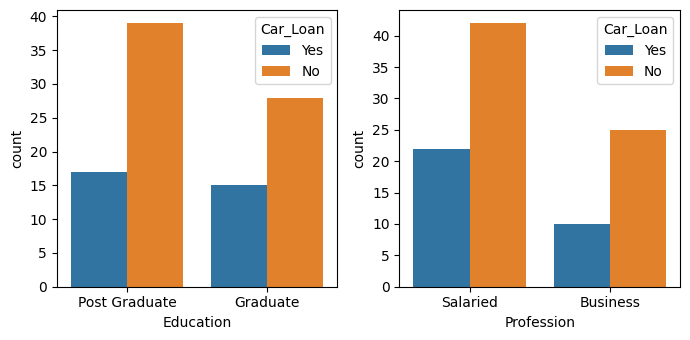

In [40]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.countplot(x ='Education', hue = 'Car_Loan',  data = inc_df, ax=axes[0])
sns.countplot(x ='Profession', hue = 'Car_Loan',  data = inc_df, ax=axes[1])
plt.show()

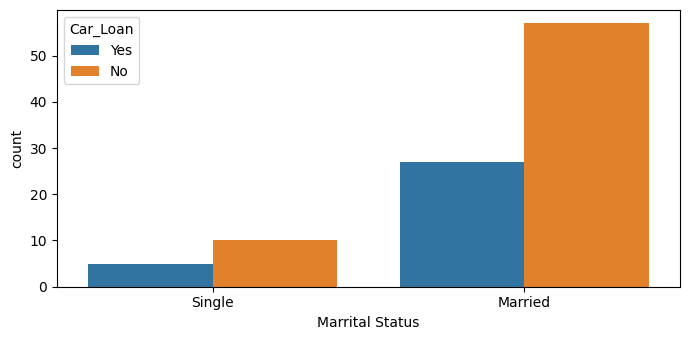

In [41]:
sns.countplot(x ='Marrital Status', hue = 'Car_Loan',  data = inc_df)
plt.show()

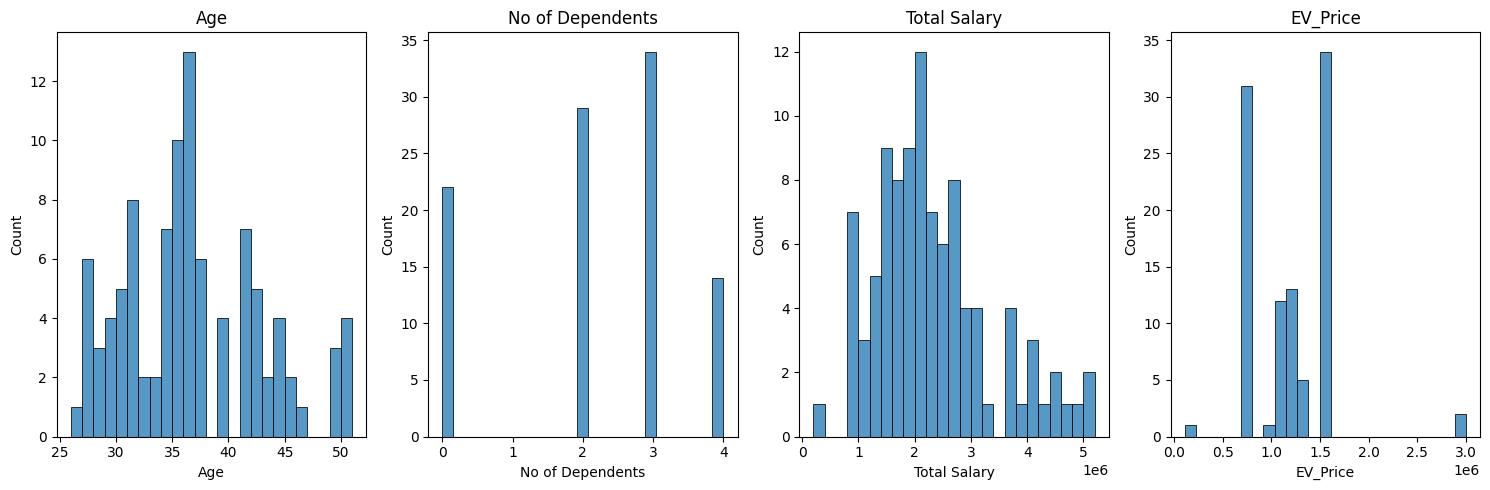

In [42]:
plt.figure(1, figsize=(15,5))
n=0

for x in ['Age', 'No of Dependents' ,'Total Salary'  ,'EV_Price']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(inc_df[x], bins= 25)
  plt.title(f'{x}')
plt.show()

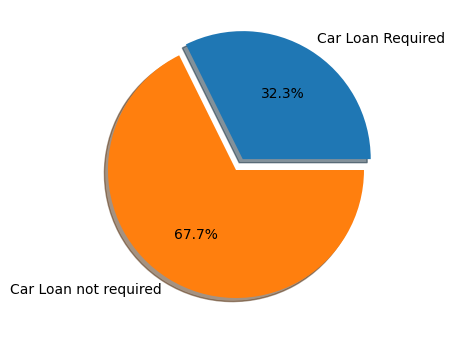

In [43]:
labels = ['Car Loan Required','Car Loan not required']
Loan_status = [inc_df.query('Car_Loan == "Yes"').Car_Loan.count(),inc_df.query('Car_Loan == "No"').Car_Loan.count()]

explode = [0.1, 0]
plt.pie(Loan_status, labels=labels, shadow = "True",
        explode=explode, autopct='%1.1f%%')
  
plt.show()

In [44]:
inc_df['Profession'].value_counts()

Profession
Salaried    64
Business    35
Name: count, dtype: int64

In [45]:
inc_df['Marrital Status'].value_counts()

Marrital Status
Married    84
Single     15
Name: count, dtype: int64

In [46]:
inc_df['Education'].value_counts()

Education
Post Graduate    56
Graduate         43
Name: count, dtype: int64

In [47]:
inc_df['Marrital Status'].replace({'Single':0,'Married':1},inplace=True)
inc_df['Car_Loan'].replace({'No':0,'Yes':1},inplace=True)
inc_df['Education'].replace({'Graduate':0,'Post Graduate':1},inplace=True)
inc_df['Profession'].replace({'Salaried':0, 'Business':1},inplace=True)

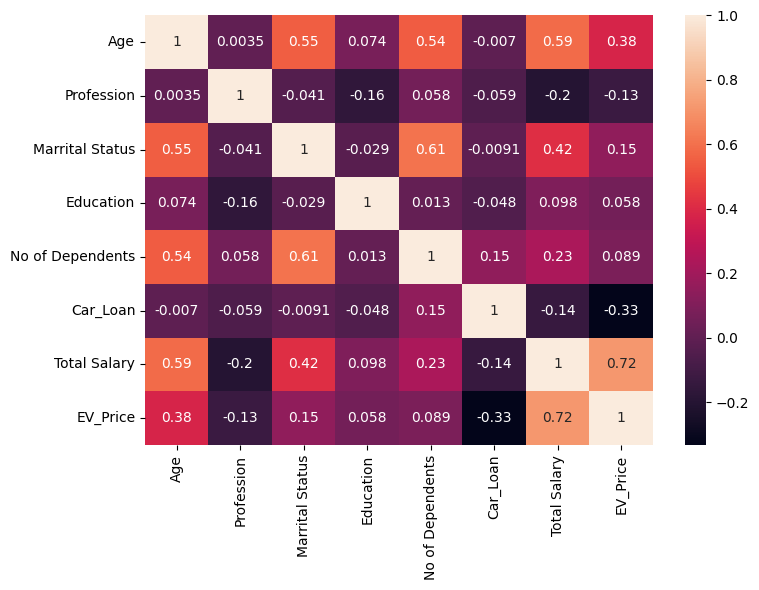

In [48]:
correlation_matrix = inc_df.corr()

# Create the heatmap
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

PCA AND CLUSTERING

In [49]:
X = inc_df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X.shape

(99, 8)

In [50]:
pca = PCA()    #creating the instance of class PCA
pca.fit_transform(X_scaled) 
pca.explained_variance_ratio_

array([0.34653101, 0.1920909 , 0.14332375, 0.11282393, 0.08822937,
       0.04894954, 0.04512684, 0.02292466])

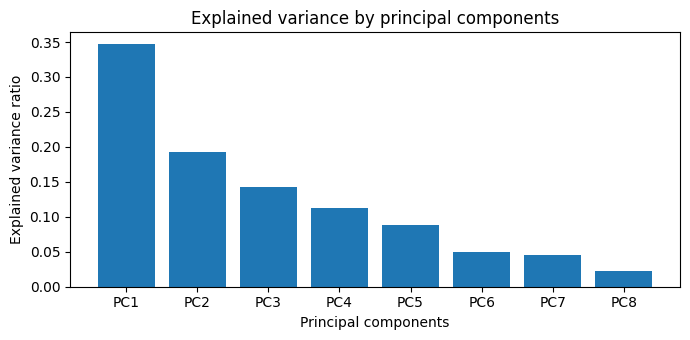

In [51]:
components=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']
var_exp = pca.explained_variance_ratio_
plt.bar(components, var_exp)
plt.title('Explained variance by principal components')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.show()

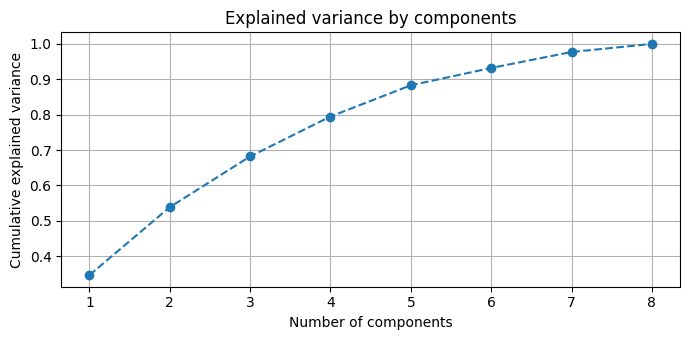

In [52]:
plt.plot(range(1,9),pca.explained_variance_ratio_.cumsum(),marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

In [53]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.456779,-0.618798,-1.775729,-0.151357,1.047749
1,-0.274146,0.658946,-1.695786,-0.042108,0.291098
2,0.879912,2.388637,0.925667,-0.363319,1.116538
3,0.771649,0.376038,0.757106,1.685393,0.163439
4,0.219923,-0.252808,-1.513077,-0.399144,0.710610


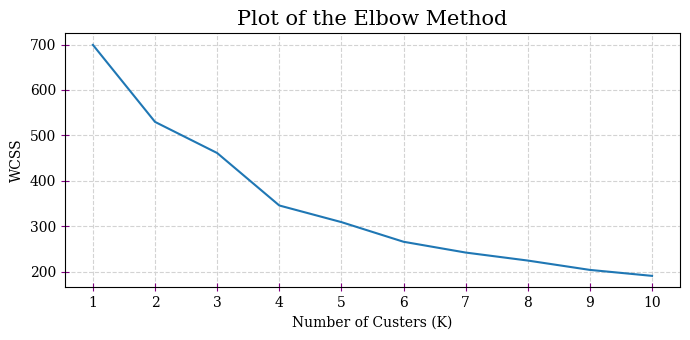

In [54]:
wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [55]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=4, random_state=90)

In [56]:
print(kmean.labels_)

[3 2 2 2 2 2 1 2 2 2 1 2 3 3 2 0 3 3 3 1 1 2 1 2 2 1 2 2 2 1 2 1 0 1 2 0 3
 1 3 1 2 3 1 1 2 1 2 1 1 2 2 0 0 0 0 0 1 3 3 3 3 3 3 2 1 2 2 1 0 1 1 0 1 1
 1 0 2 1 0 0 2 0 2 0 2 2 3 1 1 2 1 0 1 3 3 0 2 0 2]


In [57]:
pd.Series(kmean.labels_).value_counts()

2    34
1    29
3    18
0    18
Name: count, dtype: int64

In [62]:
inc_df['cluster'] = kmean.labels_
inc_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price,cluster
0,27,0,0,1,0,1,800000,800000,3
1,35,0,1,1,2,1,2000000,1000000,2
2,45,1,1,0,4,1,1800000,1200000,2
3,41,1,1,1,3,0,2200000,1200000,2
4,31,0,1,1,2,1,2600000,1600000,2


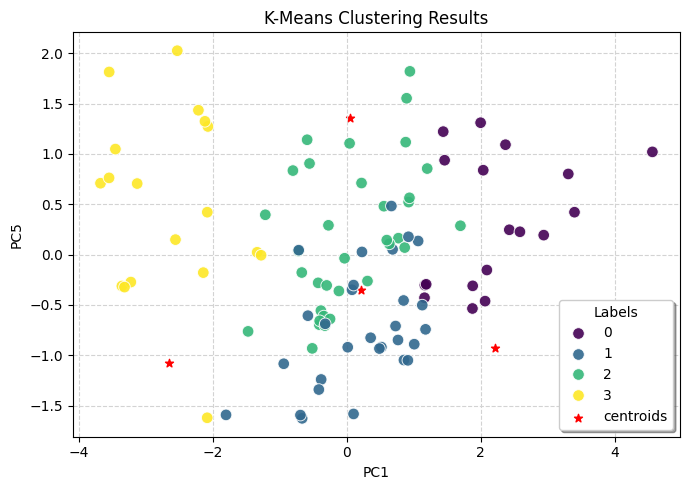

In [59]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC5', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", label="centroids")
plt.xlabel('PC1')
plt.ylabel('PC5')
plt.grid(True)
plt.tick_params(grid_color='lightgray', grid_linestyle='--')
plt.legend(title='Labels', shadow=True)
plt.title('K-Means Clustering Results')
plt.show()

In [60]:
rotations = pca.components_.T

rotations_df = pd.DataFrame(rotations, columns=[f'PC{i+1}' for i in range(rotations.shape[1])], index=inc_df.columns[:8])

rotations_df = rotations_df.round(1)

std_devs = np.sqrt(pca.explained_variance_).round(1)

print("Standard deviations:")
print(std_devs)
print("Rotation matrix:")
print(rotations_df)

Standard deviations:
[1.7 1.2 1.1 1.  0.8]
Rotation matrix:
                  PC1  PC2  PC3  PC4  PC5
Age               0.5  0.1  0.0  0.1  0.2
Profession       -0.1  0.3  0.7  0.4  0.5
Marrital Status   0.4  0.3  0.0  0.0 -0.4
Education         0.1 -0.2 -0.6  0.8  0.1
No of Dependents  0.4  0.5 -0.0  0.2 -0.2
Car_Loan         -0.1  0.5 -0.4 -0.3  0.6
Total Salary      0.5 -0.3 -0.0 -0.2  0.3
EV_Price          0.4 -0.5  0.2 -0.1  0.3


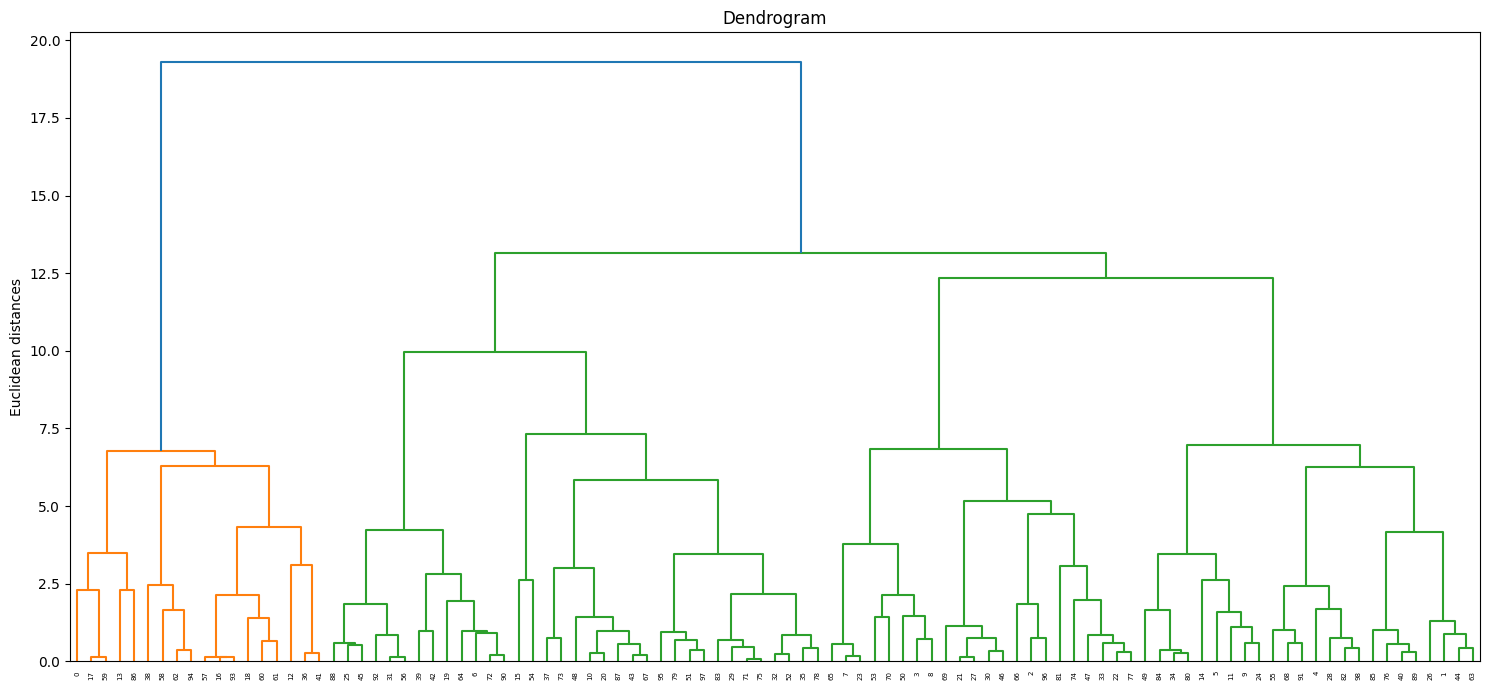

In [61]:
plt.figure(figsize=(15,7))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('')
plt.ylabel('Euclidean distances')
plt.show()

In [2]:
Cluster_0=inc_df[inc_df.cluster==0]
Cluster_1=inc_df[inc_df.cluster==1]
Cluster_2=inc_df[inc_df.cluster==2]
Cluster_3=inc_df[inc_df.cluster==3]

NameError: name 'inc_df' is not defined

In [6]:
inc_df["cluster"].value_counts()

NameError: name 'inc_df' is not defined